# Credit Risk Modeling Notebook

## Introduction
LendingClub stands as the largest peer-to-peer lending platform globally. The objective of this notebook is to delve into risk analytics within the banking and financial services sector. It aims to explore how data is employed to mitigate the potential financial losses associated with lending to customers.

## Problem Statement
LendingClub, a specialized lender for urban customers, faces the task of evaluating loan applications and making approval decisions based on applicant profiles. This decision carries two types of risks:

a) Risk of Missed Business Opportunity: When an applicant is likely to repay the loan, choosing not to approve the loan would result in a loss of potential business for the company.

b) Risk of Financial Loss: On the other hand, if an applicant is unlikely to repay the loan and is at high risk of defaulting, approving the loan could potentially lead to a financial loss for the company.

Thus, LendingClub must carefully assess each loan application, aiming to strike a balance between maximizing business opportunities by approving loans from creditworthy applicants and minimizing the potential for financial losses resulting from defaults.

This section aims to:
- Provide an overview of the credit risk modeling problem.
- Clearly define the problem statement and the objective of the analysis.
- Outline the data sources and any relevant background information.

## Data Understanding and Exploration
The dataset provides information on past loan applicants and their default status. The goal is to identify patterns that indicate the probability of an applicant defaulting. This information guides decisions like loan denial, adjusting loan amounts, offering higher interest rates to risky applicants, and more.
When individuals apply for a loan, the company can take two types of decisions:

1) Loan Acceptance: If the loan is approved, three scenarios can arise:

a) Fully Paid: The applicant successfully repays the loan, including principal and interest.

b) Current: The applicant is currently making loan repayments, and the loan term is ongoing. They are not considered as defaulting.

c) Charged-off: The applicant fails to make timely loan repayments, resulting in default.

2) Loan Rejection: The company rejects the loan application if the applicant does not meet their requirements. As a result, there is no transactional history available for these applicants in the dataset.

By analyzing the data, patterns can be identified to evaluate the likelihood of defaulting. This enables the company to make informed decisions regarding loan approvals, manage risk, and adjust interest rates accordingly.

This section incorporates the below processes:
- Import the necessary libraries and load the dataset.
- Perform initial data exploration to understand the structure and characteristics of the data.
- Handle missing values, outliers, and perform necessary data preprocessing steps.
- Conduct descriptive statistics and visualizations to gain insights into the data through EDA.

## Feature Engineering
- Perform feature selection or creation based on domain knowledge and exploratory analysis.
- Handle categorical variables by encoding or transforming them appropriately.
- Scale or normalize numerical features if required.
- Split the dataset into training and testing sets.

## Model Development and Evaluation
- Select appropriate credit risk modeling algorithms, such as logistic regression, random forests, or gradient boosting.
- Train the selected models on the training data.
- Evaluate model performance using suitable metrics like accuracy, precision, recall, and F1-score.
- Fine-tune the models through hyperparameter optimization and cross-validation.
- Compare and analyze the results of different models.

## Model Interpretation
- Interpret the trained models to understand the important features and their impact on credit risk.
- Visualize the model results, such as feature importance, coefficients, or decision boundaries.

## Model Deployment and Conclusion
- Save the trained model for future use or deployment.
- Summarize the findings and conclusions from the analysis.
- Provide recommendations or insights based on the results.
- Discuss any limitations or areas for future improvement.

## References and Acknowledgments
- List any references, data sources, or external libraries used.
- Acknowledge any collaborators, open-source projects, or code snippets used.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Libraries and Datasets

In [ ]:
# # install package if not installed
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install statsmodels


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#accepted_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')
# accepted_df = pd.read_csv('/content/accepted_2007_to_2018Q4.csv')
accepted_df=pd.read_csv('/content/drive/MyDrive/Accepted and Rejected Loans Data RMA/accepted_2007_to_2018Q4.csv')

In [ ]:
#rejected_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv')
# rejected_df = pd.read_csv('/content/rejected_2007_to_2018Q4.csv')
rejected_df=pd.read_csv('/content/drive/MyDrive/Accepted and Rejected Loans Data RMA/rejected_2007_to_2018Q4.csv')

# Data understanding

In [ ]:
# check the first 5 rows of the data
rejected_df.head()


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
# check the last 5 rows of the data
rejected_df.tail()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0
27648740,15000.0,2016-12-31,Business,684.0,10.58%,113xx,NY,< 1 year,0.0


In [ ]:
# check the first 5 rows of the data
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check the last 5 rows of the data
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check the shape of the data
rejected_df.shape


(27648741, 9)

In [ ]:
# check the shape of the data
accepted_df.shape

(2260701, 151)

In [ ]:
# check the info of the data
rejected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [ ]:
# check the info of the data
accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
# check the columns of the data
rejected_df.columns


Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
# check the columns of the data
accepted_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
# check the data types of the data
rejected_df.dtypes


Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [ ]:
# check the data types of the data
accepted_df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [ ]:
# check the missing values in the data
rejected_df.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [ ]:
# check the missing values in the data
accepted_df.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [ ]:
# check the unique values in the data
rejected_df.nunique()


Amount Requested          3640
Application Date          4238
Loan Title               73928
Risk_Score                 692
Debt-To-Income Ratio    126145
Zip Code                  1001
State                       51
Employment Length           11
Policy Code                  2
dtype: int64

In [ ]:
# check the unique values in the data
accepted_df.nunique()

id                       2260701
member_id                      0
loan_amnt                   1572
funded_amnt                 1572
funded_amnt_inv            10057
                          ...   
settlement_status              3
settlement_date               90
settlement_amount          21941
settlement_percentage       2070
settlement_term               40
Length: 151, dtype: int64

### Data cleaning

In [ ]:
# from accepted_df, drop member_id column because it only has null values
accepted_df.drop('member_id', axis=1, inplace=True)

In [ ]:
# In accepted_df, drop columns with more than 50 percent missing values
accepted_df.dropna(thresh=0.5*len(accepted_df), axis=1, inplace=True)

In [ ]:
# in rejected_df, change the data type of Application Date to datetime
rejected_df['Application Date'] = pd.to_datetime(rejected_df['Application Date'])

In [ ]:
# In rejedted_df, drop columns with more than 50 percent missing values
rejected_df.dropna(thresh=0.5*len(rejected_df), axis=1, inplace=True)

In [ ]:
accepted_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=107)

In [ ]:
rejected_df.columns

Index(['Amount Requested', 'Application Date', 'Loan Title',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
rejected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 8 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Amount Requested      float64       
 1   Application Date      datetime64[ns]
 2   Loan Title            object        
 3   Debt-To-Income Ratio  object        
 4   Zip Code              object        
 5   State                 object        
 6   Employment Length     object        
 7   Policy Code           float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.6+ GB


https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/LCDataDictionary.csv

Dictionary link

In [ ]:
# Feature trimming (20 features)

trim=["addr_state","annual_inc","dti","emp_length","fico_range_high","fico_range_low",
     "grade","home_ownership","installment","int_rate","loan_amnt","loan_status","mort_acc",
     "open_acc","pub_rec_bankruptcies","purpose","revol_util","sub_grade","term","total_acc"]


accepted_trim=accepted_df[trim]
accepted_trim.shape

(2260701, 20)

In [ ]:
# Chceking the info of accepted_trim
accepted_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   addr_state            object 
 1   annual_inc            float64
 2   dti                   float64
 3   emp_length            object 
 4   fico_range_high       float64
 5   fico_range_low        float64
 6   grade                 object 
 7   home_ownership        object 
 8   installment           float64
 9   int_rate              float64
 10  loan_amnt             float64
 11  loan_status           object 
 12  mort_acc              float64
 13  open_acc              float64
 14  pub_rec_bankruptcies  float64
 15  purpose               object 
 16  revol_util            float64
 17  sub_grade             object 
 18  term                  object 
 19  total_acc             float64
dtypes: float64(12), object(8)
memory usage: 345.0+ MB


In [ ]:
# check for null values in accpepted_trim
accepted_trim.isnull().sum()

addr_state                  33
annual_inc                  37
dti                       1744
emp_length              146940
fico_range_high             33
fico_range_low              33
grade                       33
home_ownership              33
installment                 33
int_rate                    33
loan_amnt                   33
loan_status                 33
mort_acc                 50063
open_acc                    62
pub_rec_bankruptcies      1398
purpose                     33
revol_util                1835
sub_grade                   33
term                        33
total_acc                   62
dtype: int64

In [ ]:
# check for null values in rejected_df
rejected_df.isnull().sum()

Amount Requested             0
Application Date             0
Loan Title                1303
Debt-To-Income Ratio         0
Zip Code                   293
State                       22
Employment Length       951355
Policy Code                918
dtype: int64

In [ ]:
# check the shape of rejected_df
accepted_trim.shape

(2260701, 20)

In [ ]:
# check the shape of accpepted_trim
rejected_df.shape

(27648741, 8)

In [ ]:
# check for unique values in rejected_df
accepted_trim.nunique()

addr_state                 51
annual_inc              89368
dti                     10845
emp_length                 11
fico_range_high            48
fico_range_low             48
grade                       7
home_ownership              6
installment             93301
int_rate                  673
loan_amnt                1572
loan_status                 9
mort_acc                   47
open_acc                   91
pub_rec_bankruptcies       12
purpose                    14
revol_util               1430
sub_grade                  35
term                        2
total_acc                 152
dtype: int64

In [ ]:
# check for unique values in rejected_df
rejected_df.nunique()

Amount Requested          3640
Application Date          4238
Loan Title               73928
Debt-To-Income Ratio    126145
Zip Code                  1001
State                       51
Employment Length           11
Policy Code                  2
dtype: int64

**accepted_trim dataset:** This dataset is about approved loans from the Lending
Club. It contains 2,260,701 entries (rows) and 20 features (columns). Here's what each column likely represents:



1.   addr_state: The U.S. state of the borrower.
2.   annual_inc: The annual income of the borrower, likely in dollars.

1.   annual_inc: The annual income of the borrower, likely in dollars.
2.   dti: Debt-to-income ratio of the borrower.

5.   emp_length: Employment length of the borrower, possibly in years.

1.   fico_range_high and fico_range_low: The range of FICO scores for the borrower. FICO scores are a type of credit score used by lenders to help assess credit risk.
2.   grade and sub_grade: Lending Club's grading system for the creditworthiness of the borrower.
2.   home_ownership: The home ownership status of the borrower (e.g., rent, own, mortgage).
1.   installment: The monthly payment owed by the borrower.
int_rate: The interest rate on the loan.
1.   loan_amnt: The amount of the loan.
2.   loan_status: The status of the loan (e.g., fully paid, charged off).
2.   mort_acc: Number of mortgage accounts.
1.   open_acc: Number of open credit lines in the borrower's credit file.
1.   pub_rec_bankruptcies: Number of public record bankruptcies.
1.   purpose: Purpose of the loan.
2.   revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
2.   term: The term of the loan (e.g., 36 months, 60 months).
2.   total_acc: The total number of credit lines currently in the borrower's credit file.


**rejected_df dataset**: This dataset is about loan applications that were rejected by the Lending Club. It contains 27,648,741 entries and 8 features.

Here's what each column represents:
1.   Amount Requested: The amount of the loan requested by the applicant.
2.   Application Date: The date the loan application was submitted.
2.   Loan Title: The title or description of the loan provided by the applicant.
1.   Debt-To-Income Ratio: The debt-to-income ratio of the applicant.
1.   Zip Code: The zip code of the applicant.
2.   State: The U.S. state of the applicant
2.   Employment Length: The length of the applicant's employment, possibly in years.
1.   Policy Code: An internal code representing the lending policy.
2.   List item



Each dataset has a number of missing or null values in various columns. These missing values could potentially introduce bias or inaccuracies in any analysis or model built using this data, and will need to be handled appropriately during the data cleaning process.

The unique values for categorical variables like addr_state or grade could represent the number of categories in the data. For numerical variables like annual_inc or loan_amnt, a high number of unique values could indicate a wide range of values, and may require further investigation to understand their distribution.

In [ ]:
# drop rows with null values in accepted_trim and rejected_df
accepted_trim.dropna(inplace=True)
rejected_df.dropna(inplace=True)

In [ ]:
# Check the shape
accepted_trim.shape

# Dropped 197,263 rows with null values

(2063438, 20)

In [ ]:
# Check the shape
rejected_df.shape

# Dropped 953,770 rows with null values

(26694971, 8)

In [ ]:
# Check for outliers
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns.tolist():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
    return df

# Removing outliers from the dataframes
accepted_trim = remove_outliers(accepted_trim)
rejected_df = remove_outliers(rejected_df)

In [ ]:
accepted_trim.head()

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,3600.0,Fully Paid,1.0,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,24700.0,Fully Paid,4.0,22.0,0.0,small_business,19.2,C1,36 months,38.0
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,20000.0,Fully Paid,5.0,6.0,0.0,home_improvement,56.2,B4,60 months,18.0
3,NJ,110000.0,17.06,10+ years,NaN,NaN,C,MORTGAGE,829.90,14.85,35000.0,Current,1.0,13.0,0.0,debt_consolidation,11.6,C5,60 months,17.0
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,10400.0,Fully Paid,6.0,12.0,0.0,major_purchase,64.5,F1,60 months,35.0


In [ ]:
def extract_term(s):
    if isinstance(s, str):  # check if it's a string
        return int(s.split()[0]), s.split()[1]
    else:
        return None, None  # handle NaN or unexpected values

# Apply the function to the 'term' column
accepted_trim['Term Number'], accepted_trim['Term Unit'] = zip(*accepted_trim['term'].map(extract_term))


In [ ]:
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
print(rejected_df['Employment Length'].unique())

['4 years' '< 1 year' '1 year' '3 years' '2 years' '10+ years' '9 years'
 '5 years' '7 years' '6 years' '8 years']


In [ ]:
def extract_employment_length(s):
    if s == '< 1 year':
        return 0, 'less_than_year'
    elif s == '10+ years':
        return 10, 'ten_or_more_years'
    elif isinstance(s, str):  # check if it's a string
        return int(s.split()[0]), 'exact_years'
    else:
        return None, None  # handle NaN or unexpected values

# Apply the function to the 'Employment Length' column
rejected_df['Employment Length Number'], rejected_df['Employment Length Context'] = zip(*rejected_df['Employment Length'].map(extract_employment_length))


The function extract_employment_length takes a string from the Employment Length column and returns a tuple with the number of years and the context. The map() function is then used to apply this function to each value in the column, and the results are unpacked into two new columns in the DataFrame.

After running this code, you should have two new columns in your DataFrame: Employment Length Number, which contains the number of years of employment as an integer, and Employment Length Context, which contains the context as a string. You can then use these columns for further analysis or modeling.

In [ ]:
# Remove the '%' sign and convert to float
rejected_df['Debt-To-Income Ratio'] = rejected_df['Debt-To-Income Ratio'].str.replace('%', '').astype(float)


In [ ]:
# drop rows with null values in accepted_trim and rejected_df
accepted_trim.dropna(inplace=True)
rejected_df.dropna(inplace=True)

In [ ]:
accepted_trim.head()

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,...,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc,Term Number,Term Unit
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,...,1.0,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0,36,months
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,...,4.0,22.0,0.0,small_business,19.2,C1,36 months,38.0,36,months
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,...,5.0,6.0,0.0,home_improvement,56.2,B4,60 months,18.0,60,months
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,...,6.0,12.0,0.0,major_purchase,64.5,F1,60 months,35.0,60,months
5,GA,34000.0,10.20,4 years,694.0,690.0,C,RENT,405.18,13.44,...,0.0,5.0,0.0,debt_consolidation,68.4,C3,36 months,6.0,36,months


In [ ]:
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,Employment Length Number,Employment Length Context
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10.00,481xx,NM,4 years,0.0,4,exact_years
1,1000.0,2007-05-26,Consolidating Debt,10.00,010xx,MA,< 1 year,0.0,0,less_than_year
2,11000.0,2007-05-27,Want to consolidate my debt,10.00,212xx,MD,1 year,0.0,1,exact_years
3,6000.0,2007-05-27,waksman,38.64,017xx,MA,< 1 year,0.0,0,less_than_year
4,1500.0,2007-05-27,mdrigo,9.43,209xx,MD,< 1 year,0.0,0,less_than_year


# Exploratory Data Analysis (EDA)

In [ ]:
accepted_trim.columns

Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'open_acc',
       'pub_rec_bankruptcies', 'purpose', 'revol_util', 'sub_grade', 'term',
       'total_acc', 'Term Number', 'Term Unit'],
      dtype='object')

In [ ]:
rejected_df.columns

Index(['Amount Requested', 'Application Date', 'Loan Title',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code', 'Employment Length Number', 'Employment Length Context'],
      dtype='object')

####EDA for Accepted_trim (Approved Loans of the Lending Club)

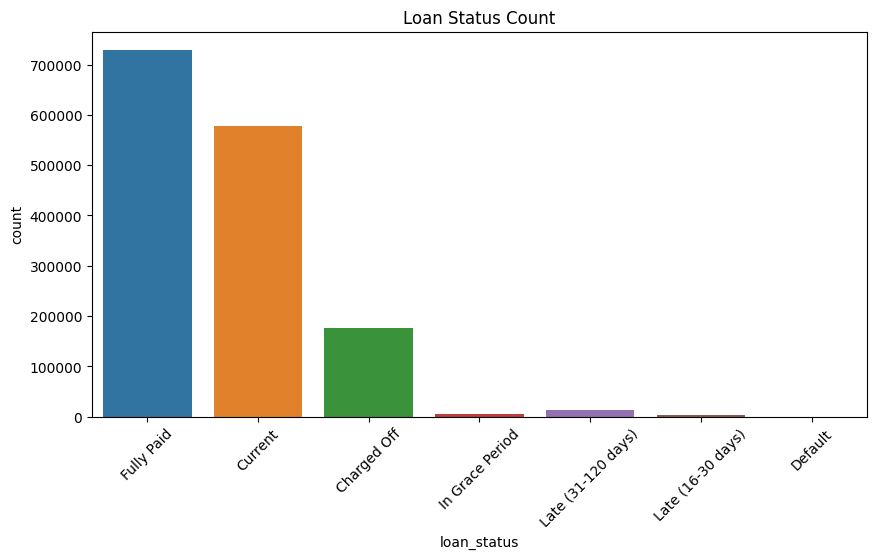

In [ ]:
# A Visualization of the distribution of the status of loans disbursed from the accepted loans
plt.figure(figsize=(10, 5))
sns.countplot(data=accepted_trim, x='loan_status')
plt.title('Loan Status Count')
plt.xticks(rotation=45)
plt.show()

It is apparent that loans classified as "Fully paid" exhibit a significantly higher count in comparison to those categorized as "Defaulted," thereby highlighting a notable disparity in their respective statuses.

Text(0.5, 1.0, 'Loan status distribution')

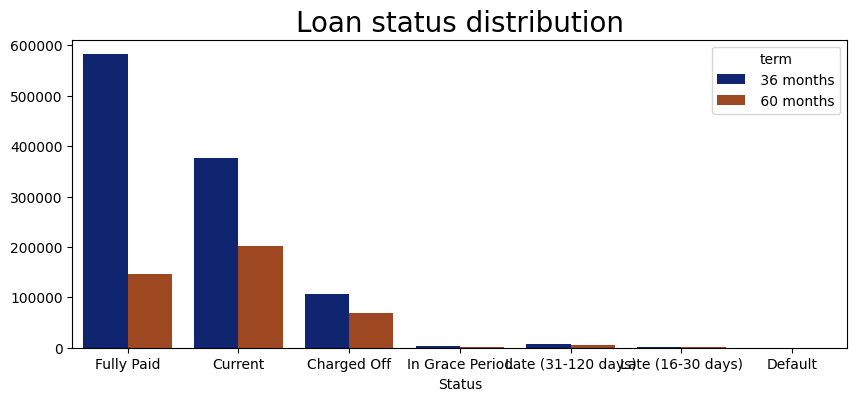

In [ ]:
#We can choose between the above and the below, which works for us :)
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,x="loan_status",hue="term",palette='dark')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status distribution', size=20)

In [ ]:
accepted_trim.groupby('loan_status').describe()

annual_inc                                                \
                        count          mean           std      min      25%   
loan_status                                                                   
Charged Off          175967.0  65459.062090  29158.507560    750.0  44000.0   
Current              578561.0  71245.462193  31751.385927      0.0  48000.0   
Default                  23.0  66017.043478  30379.911861  30000.0  47000.0   
Fully Paid           729131.0  69941.591638  30863.987017    600.0  47000.0   
In Grace Period        5316.0  71766.680673  31225.423510   6000.0  48000.0   
Late (16-30 days)      2628.0  71731.544981  31944.882133   6000.0  48000.0   
Late (31-120 days)    13270.0  69255.778616  30846.845478  10000.0  45924.0   

                                                     dti             ...  \
                        50%      75%       max     count       mean  ...   
loan_status                                                          ...   
Charged Off         60000.0  80000.0  165400.0  175967.0  20.056841  ...   
Current             65000.0  90000.0  165500.0  578561.0  18.666991  ...   
Default             62400.0  77500.0  165000.0      23.0  16.471739  ...   
Fully Paid          65000.0  88400.0  165500.0  729131.0  18.057770  ...   
In Grace Period     66002.5  90000.0  165500.0    5316.0  19.196695  ...   
Late (16-30 days)   65000.0  90000.0  165000.0    2628.0  18.714262  ...   
Late (31-120 days)  64000.0  86000.0  165000.0   13270.0  18.915543  ...   

                   total_acc       Term Number                              \
                         75%   max       count       mean        std   min   
loan_status                                                                  
Charged Off             30.0  53.0    175967.0  45.432541  11.722156  36.0   
Current                 28.0  53.0    578561.0  44.409278  11.450194  36.0   
Default                 26.0  38.0        23.0  44.347826  11.687634  36.0   
Fully Paid              30.0  53.0    729131.0  40.844627   9.633316  36.0   
In Grace Period         28.0  53.0      5316.0  45.959368  11.826332  36.0   
Late (16-30 days)       27.0  53.0      2628.0  45.378995  11.712495  36.0   
Late (31-120 days)      28.0  53.0     13270.0  45.683195  11.774670  36.0   

                                            
                     25%   50%   75%   max  
loan_status                                 
Charged Off         36.0  36.0  60.0  60.0  
Current             36.0  36.0  60.0  60.0  
Default             36.0  36.0  60.0  60.0  
Fully Paid          36.0  36.0  36.0  60.0  
In Grace Period     36.0  36.0  60.0  60.0  
Late (16-30 days)   36.0  36.0  60.0  60.0  
Late (31-120 days)  36.0  36.0  60.0  60.0  

[7 rows x 104 columns]

From the above table, we're able to see the statistical distribution of the Loan Status variable. It is evident that there is lot of data about current loan , charged off loan and Fully paid loans.

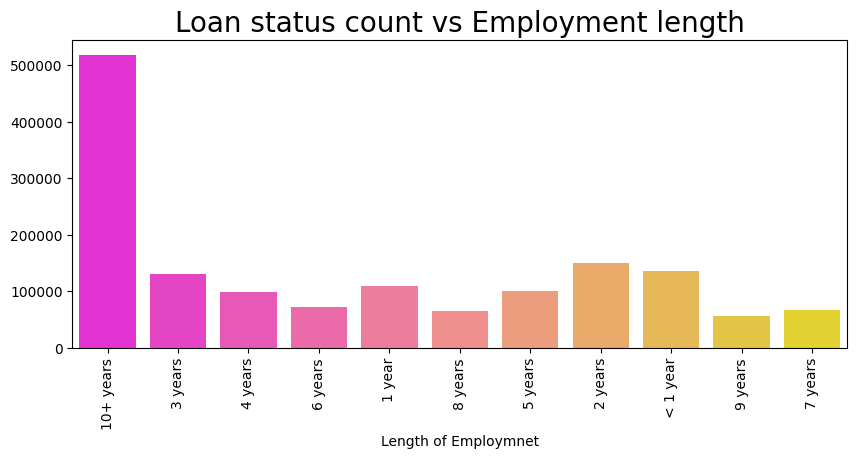

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,x="emp_length",palette='spring')
ax.set(xlabel='Length of Employmnet', ylabel='')
ax.set_title('Loan status count vs Employment length', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
accepted_trim['emp_length'].value_counts()

10+ years    518543
2 years      149148
< 1 year     135811
3 years      131391
1 year       109812
5 years       99956
4 years       98155
6 years       73031
7 years       66242
8 years       65841
9 years       56966
Name: emp_length, dtype: int64

From the above illustration and summary, A clear pattern emerges wherein employees with a tenure exceeding 10 years demonstrate a distinct advantage in terms of loan accessibility compared to their counterparts with relatively shorter durations of employment.

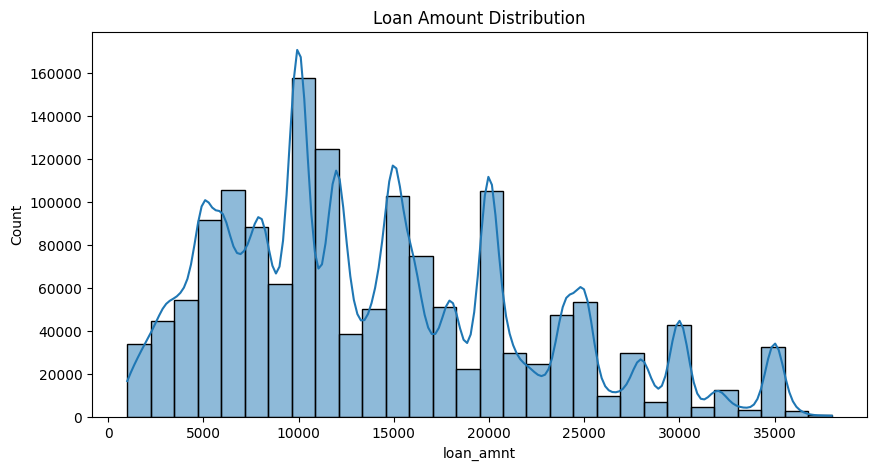

In [ ]:
# A Visualization of the distribution of loan amounts
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='loan_amnt', kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

From the above visualization, a conspicuous pattern emerges, revealing a discernible prevalence of loans disbursed in the 10,000 currency unit range, surpassing the allocation of funds in the remaining loan categories.

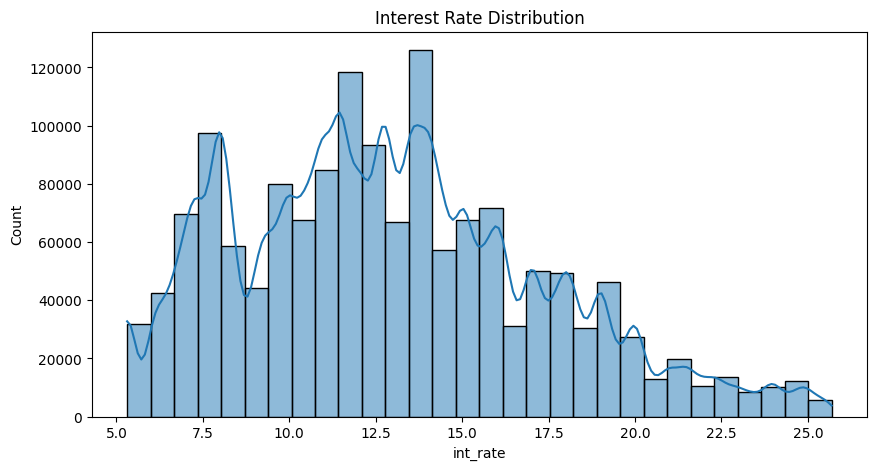

In [ ]:
# A Visualization of the distribution of interest rates
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='int_rate', kde=True, bins=30)
plt.title('Interest Rate Distribution')
plt.show()

Based on the visual analysis presented above, it appears that loans with a 15% interest rate have exhibited the highest disbursal frequency throughout the observed period

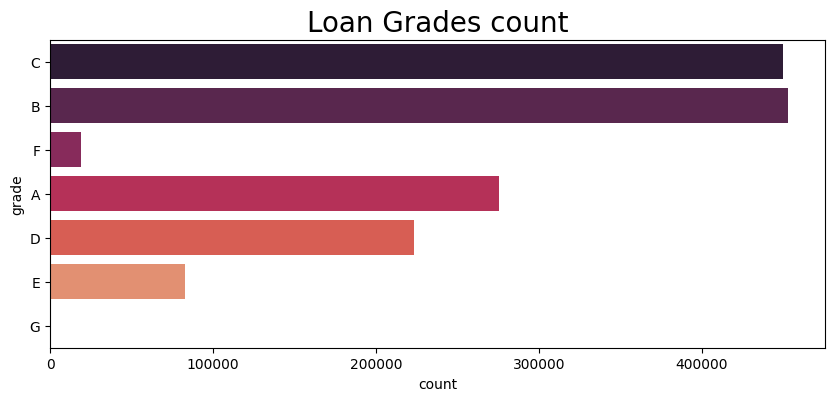

In [ ]:
#Visualizing the Loan Grade Count
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=accepted_trim,y="grade",palette='rocket')
ax.set_title('Loan Grades count', size=20)
plt.show()

Upon careful observation of the  visualization, a salient inference arises, unequivocally indicating that loan grades B and C exhibit a notable predominance in terms of their count.

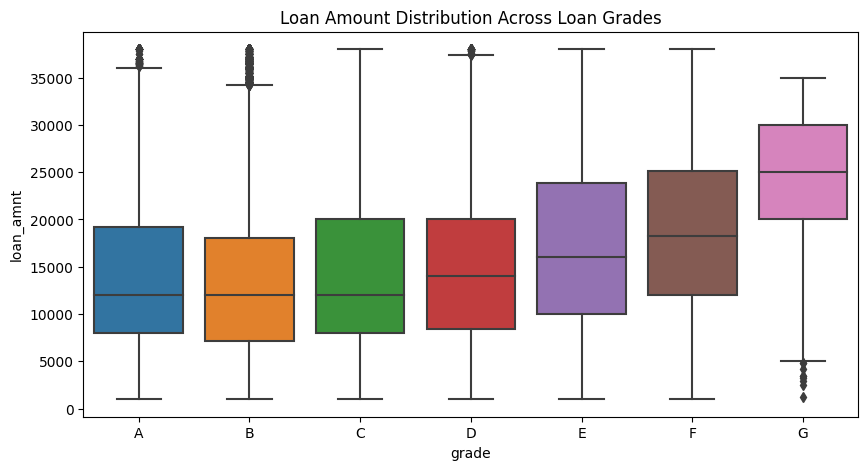

In [ ]:
# An Analysis of the distribution of loan amounts across different loan grades
plt.figure(figsize=(10, 5))
sns.boxplot(data=accepted_trim, x='grade', y='loan_amnt', order=sorted(accepted_trim['grade'].unique()))
plt.title('Loan Amount Distribution Across Loan Grades')
plt.show()

The above is a depiction of the distribution of loan amounts as compared to the respective Loan grades.

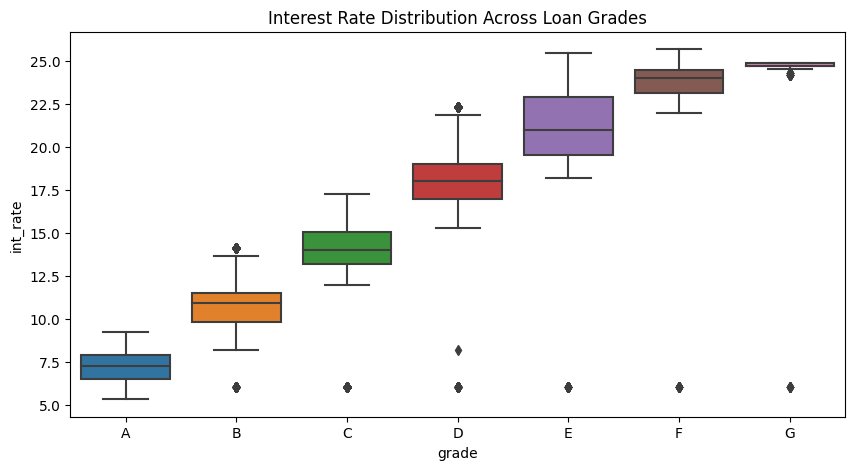

In [ ]:
#An Analysis of the distribution of interest rates across different loan grades
plt.figure(figsize=(10, 5))
sns.boxplot(data=accepted_trim, x='grade', y='int_rate', order=sorted(accepted_trim['grade'].unique()))
plt.title('Interest Rate Distribution Across Loan Grades')
plt.show()

From the above visual, It looks like F and G subgrades have the highest interest rates as compared to the rest.

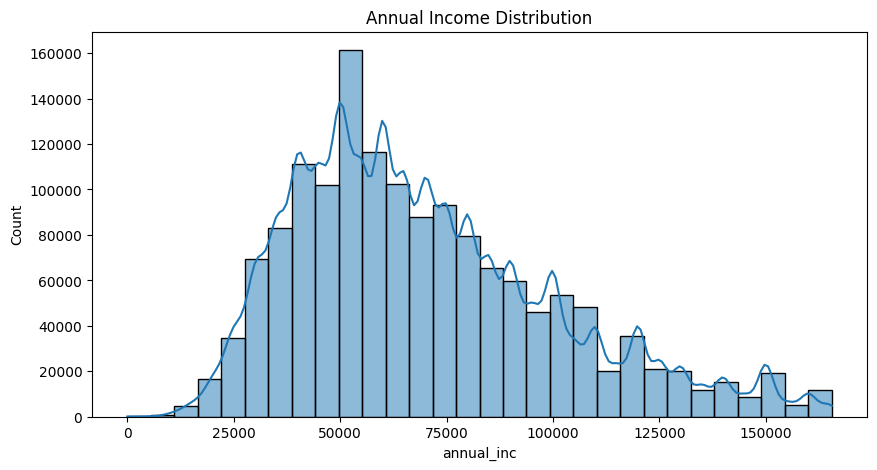

In [ ]:
#An Analysis of the distribution of annual incomes
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim[accepted_trim['annual_inc'] < 300000], x='annual_inc', kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

From the above visual, the loanees with the annual income of 50,000 have access to the most loans than their counterparts.

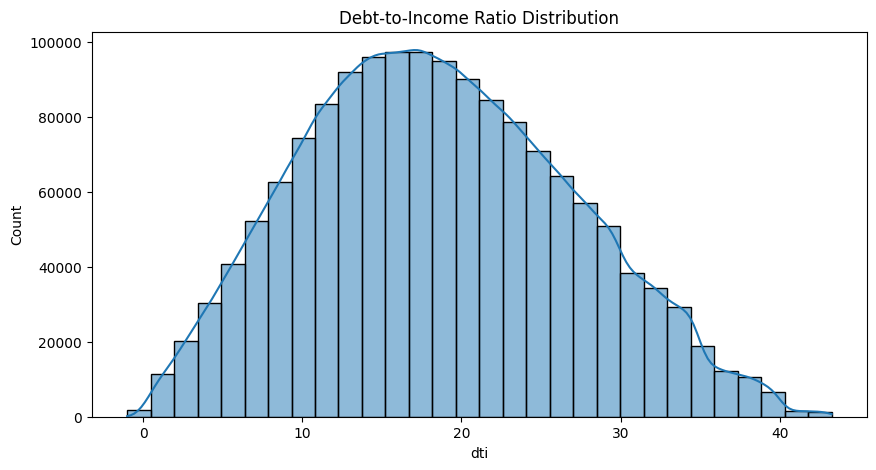

In [ ]:
#An Analysis the distribution of debt-to-income ratios
plt.figure(figsize=(10, 5))
sns.histplot(data=accepted_trim, x='dti', kde=True, bins=30)
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

This discernibly illustrates that when an individual's debt-to-income ratio is elevated, there is a greater likelihood of loan default in the presence of higher interest rates. It seems that the smaller the dti the more likely that the loan will not be paid.

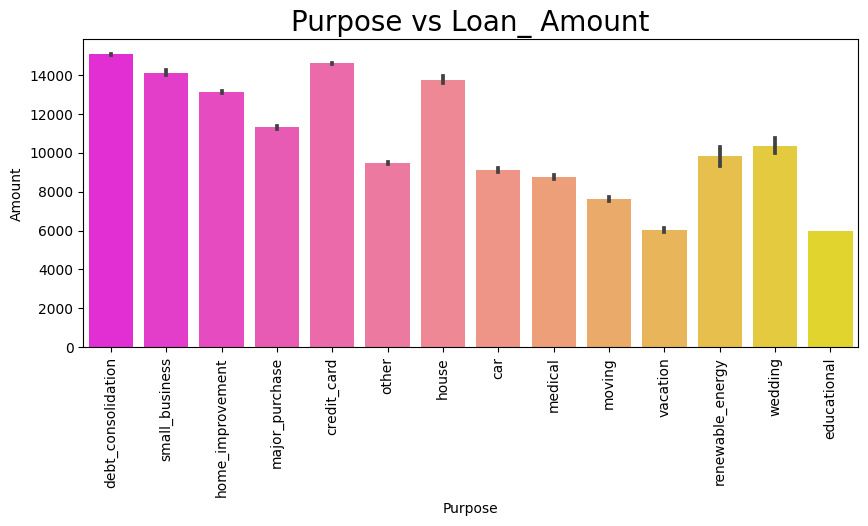

In [ ]:
#A Visualization of the Purpose of the loans versus the respective amounts
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=accepted_trim,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
accepted_trim['purpose'].value_counts()

debt_consolidation    858162
credit_card           361188
other                  90521
home_improvement       86231
major_purchase         31420
medical                17235
car                    15420
small_business         13735
moving                 10542
vacation               10461
house                   8011
wedding                 1079
renewable_energy         890
educational                1
Name: purpose, dtype: int64

The chart above depicts the purpose for which the loanees take up loans. It's apparent that most take loans for Debt Consolidation, small businesses, credit card settlement and housing.

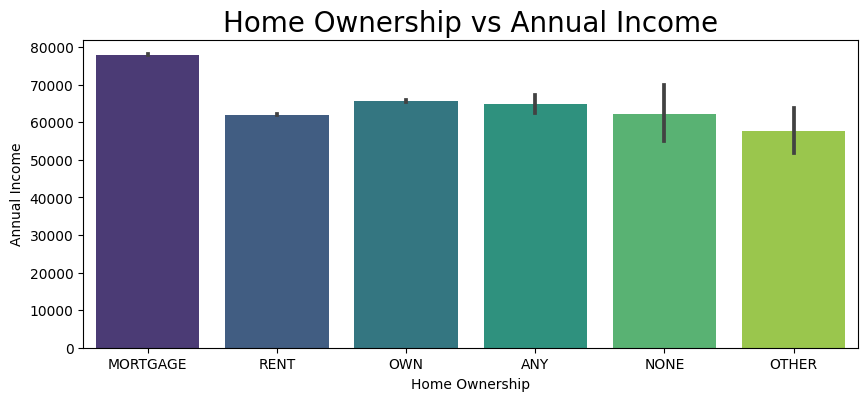

In [ ]:
#An Analysis of the Home Ownership Vs the Annual Income
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=accepted_trim,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

In the above comparison, It is evident that loanees with a higher annual income opt for a Mortgage package when it comes to Home Ownership.

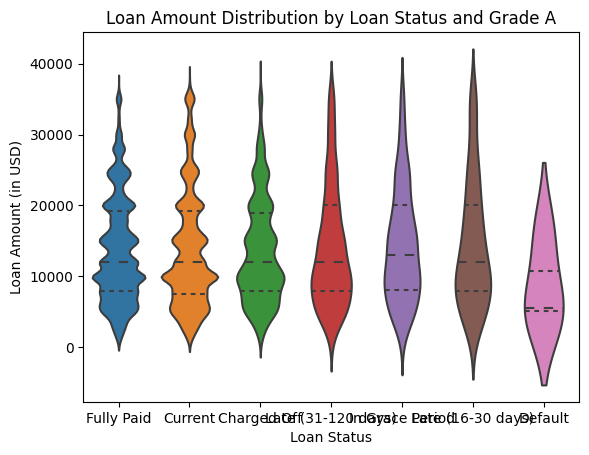

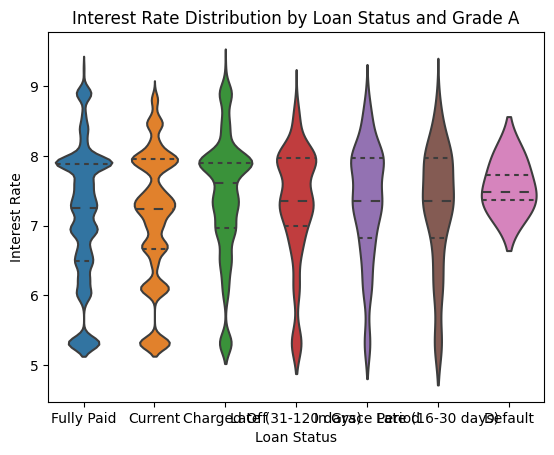

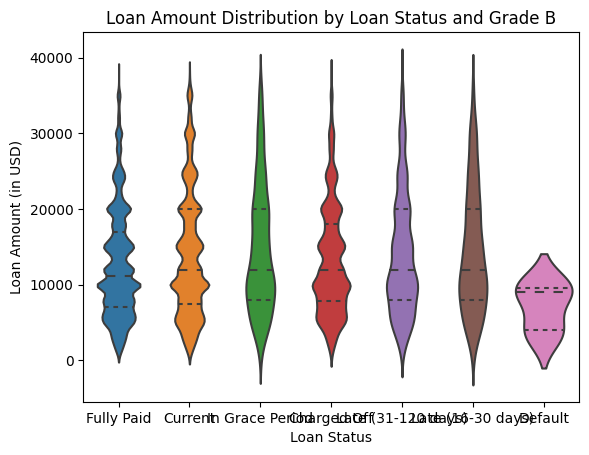

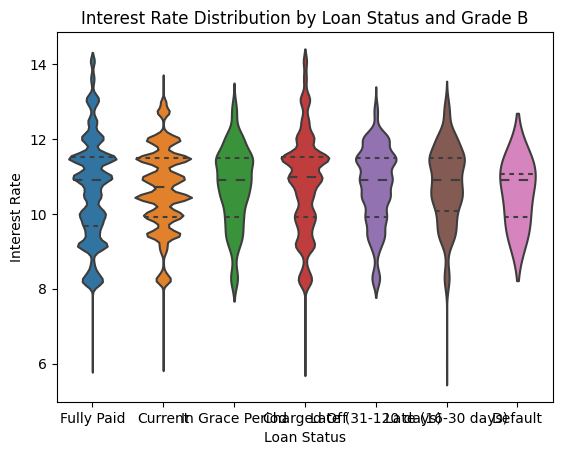

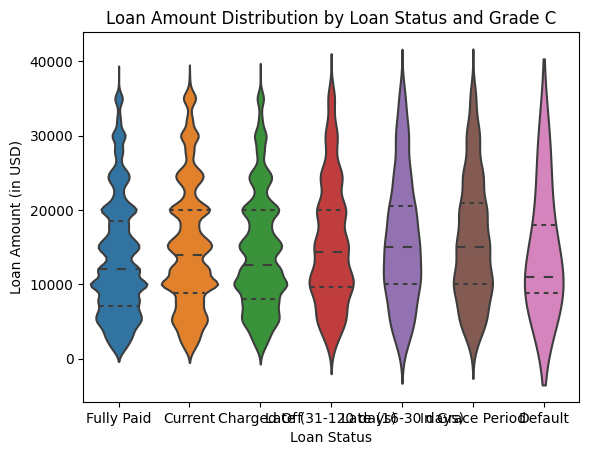

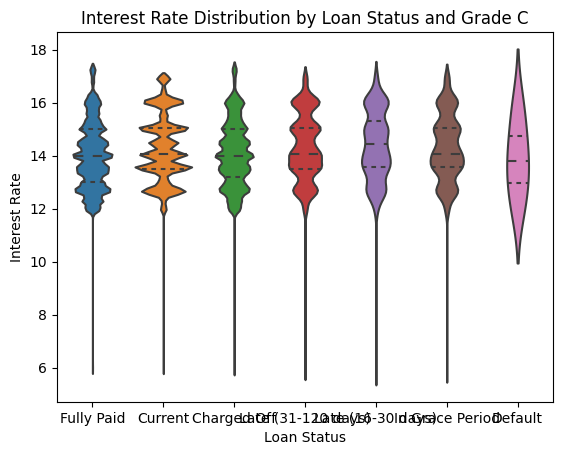

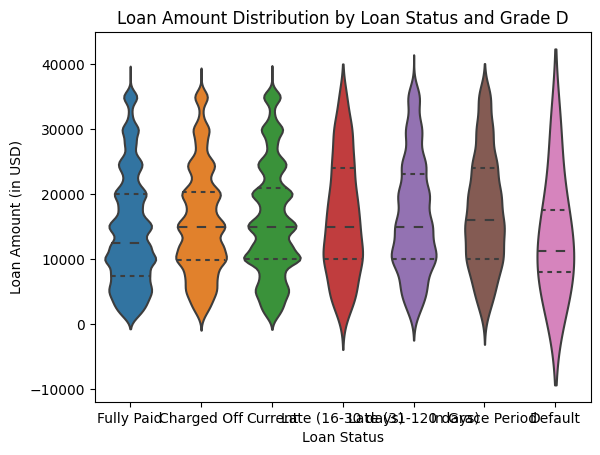

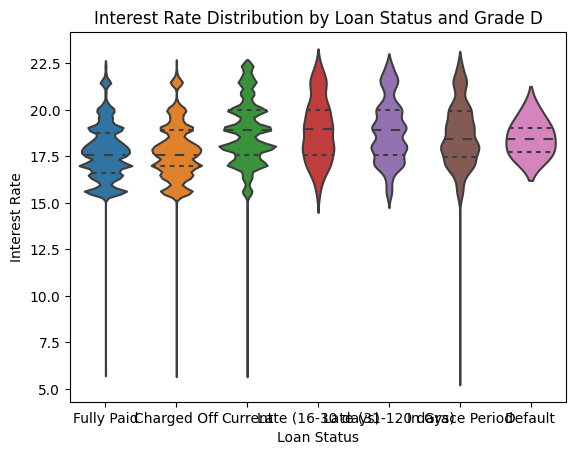

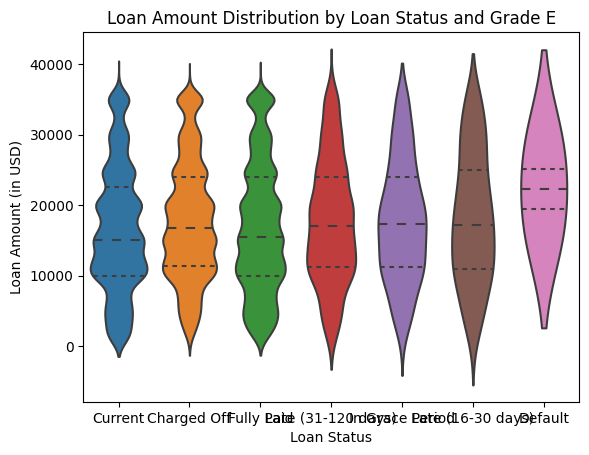

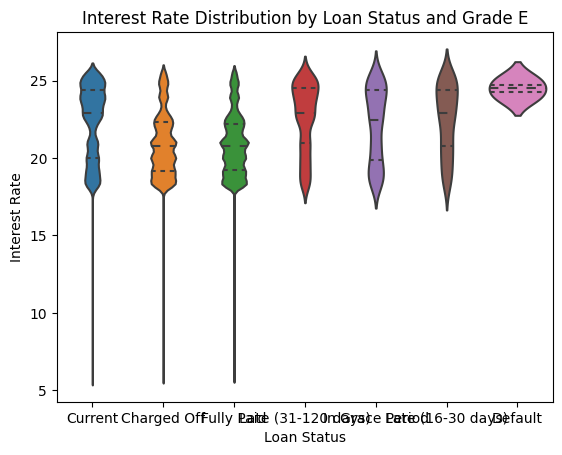

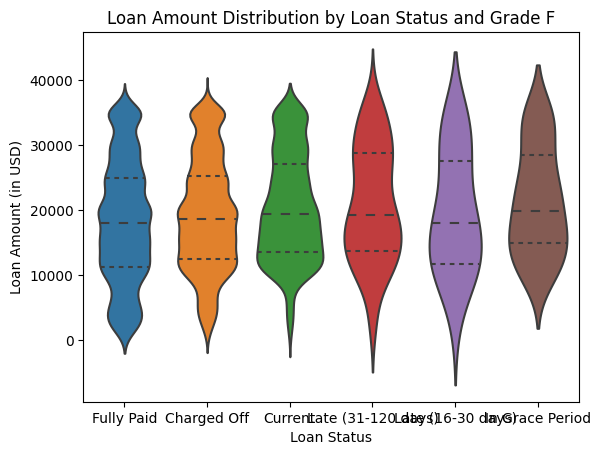

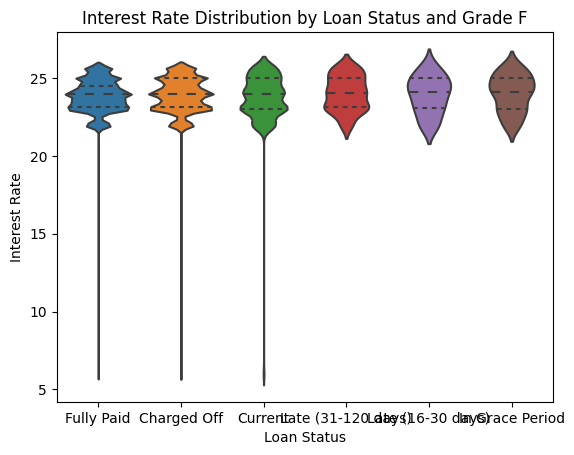

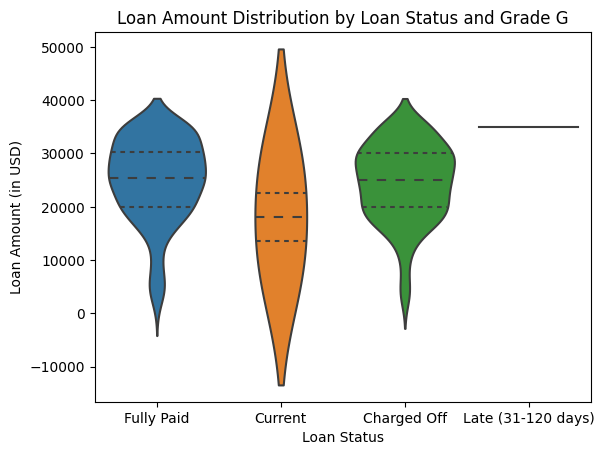

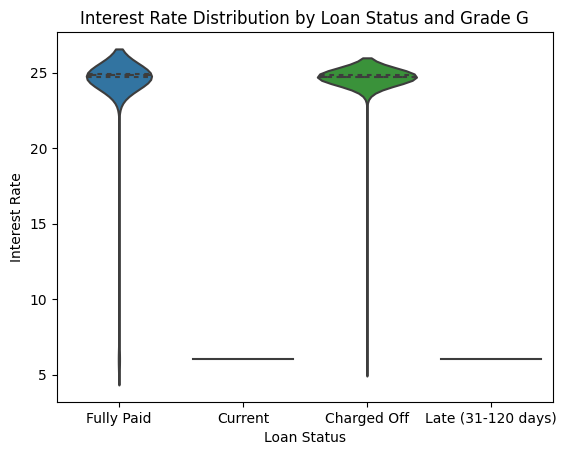

In [ ]:
# Analyze the distribution of loan amounts and interest rates by loan grade and loan status using violin plots
# plt.figure(figsize=(12, 6))
for grade in sorted(accepted_trim['grade'].unique()):
    df_grade = accepted_trim[accepted_trim['grade'] == grade]
    sns.violinplot(data=df_grade, x='loan_status', y='loan_amnt', inner='quartile')
    plt.title(f'Loan Amount Distribution by Loan Status and Grade {grade}')
    plt.xlabel('Loan Status')
    plt.ylabel('Loan Amount (in USD)')
    plt.show()

    sns.violinplot(data=df_grade, x='loan_status', y='int_rate', inner='quartile')
    plt.title(f'Interest Rate Distribution by Loan Status and Grade {grade}')
    plt.xlabel('Loan Status')
    plt.ylabel('Interest Rate')
    plt.show()

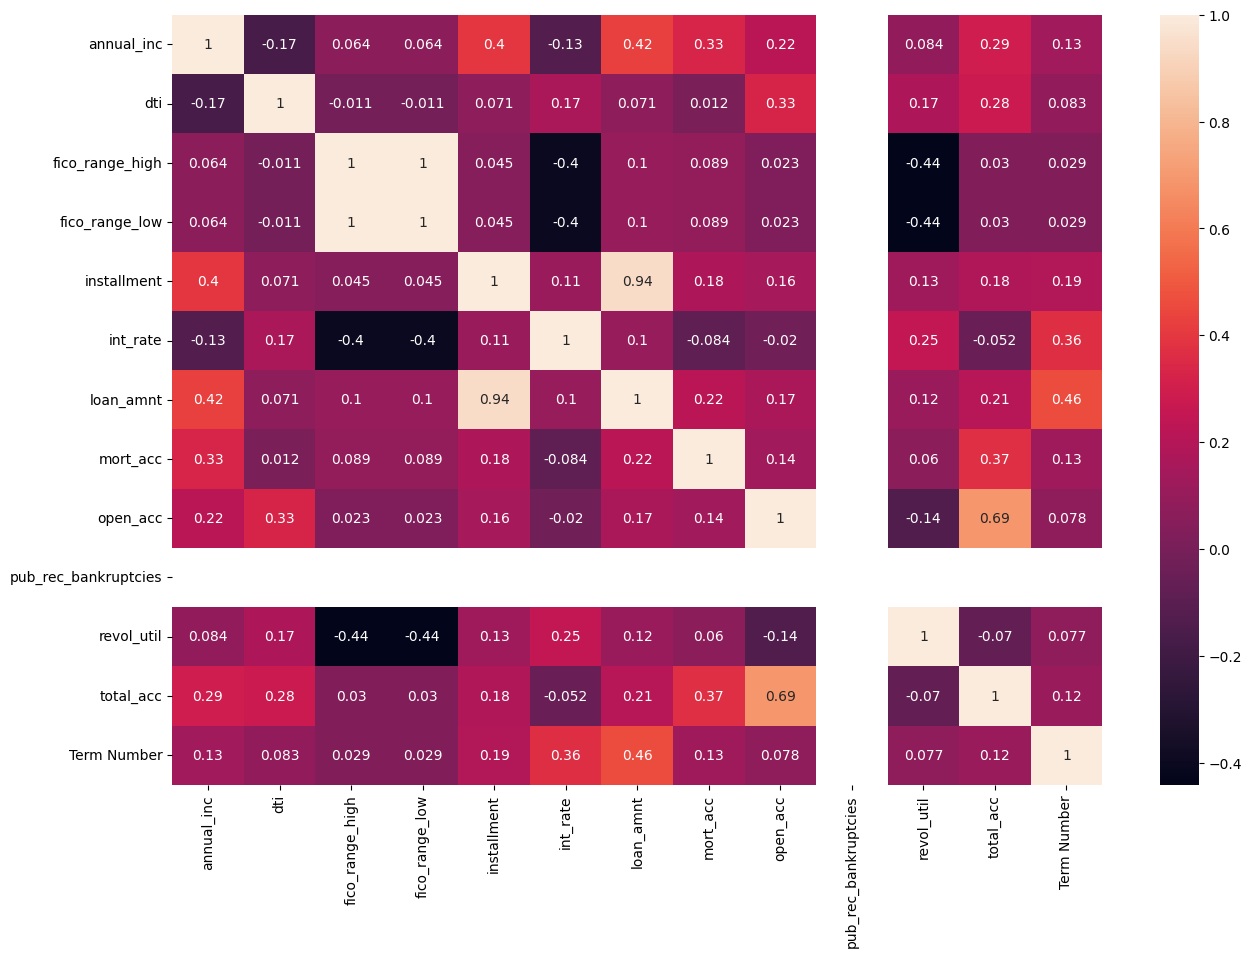

In [ ]:
# Plotting a heatmap for the Accepted Loans
plt.figure(figsize=(15,10))
sns.heatmap(accepted_trim.corr(),annot=True)
plt.show()

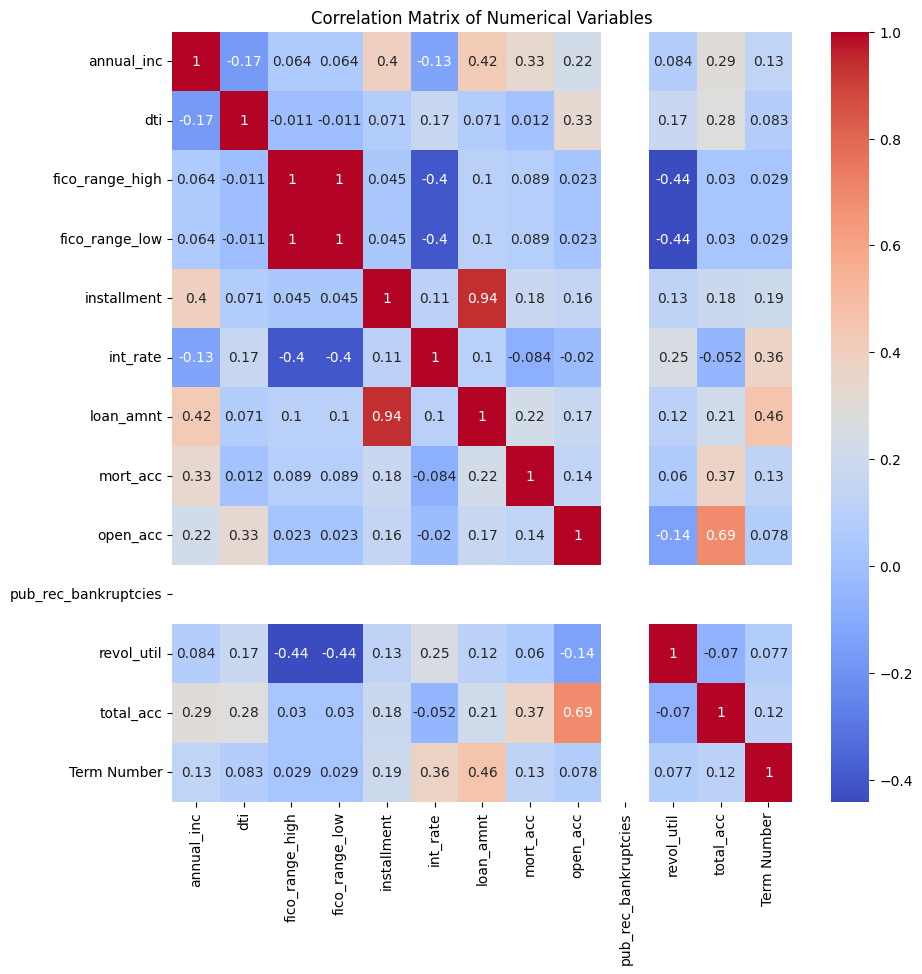

In [ ]:
#An Analysis of the correlation matrix between numerical variables
plt.figure(figsize=(10, 10))
sns.heatmap(accepted_trim[['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'installment', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec_bankruptcies', 'revol_util', 'total_acc', 'Term Number']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

There's a strong correlation between "loan_amnt" the "installment" feature.

In [ ]:
# Dividing the features into categorical and numerical
categorical=[feature for feature in accepted_trim.columns if accepted_trim[feature].dtype=='object']
numerical=[feature for feature in accepted_trim.columns if feature not in categorical]

In [ ]:
print("Categorical columns:",categorical)
print("Numerical columns:",numerical)

Categorical columns: ['addr_state', 'emp_length', 'grade', 'home_ownership', 'loan_status', 'purpose', 'sub_grade', 'term', 'Term Unit']
Numerical columns: ['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'installment', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec_bankruptcies', 'revol_util', 'total_acc', 'Term Number']


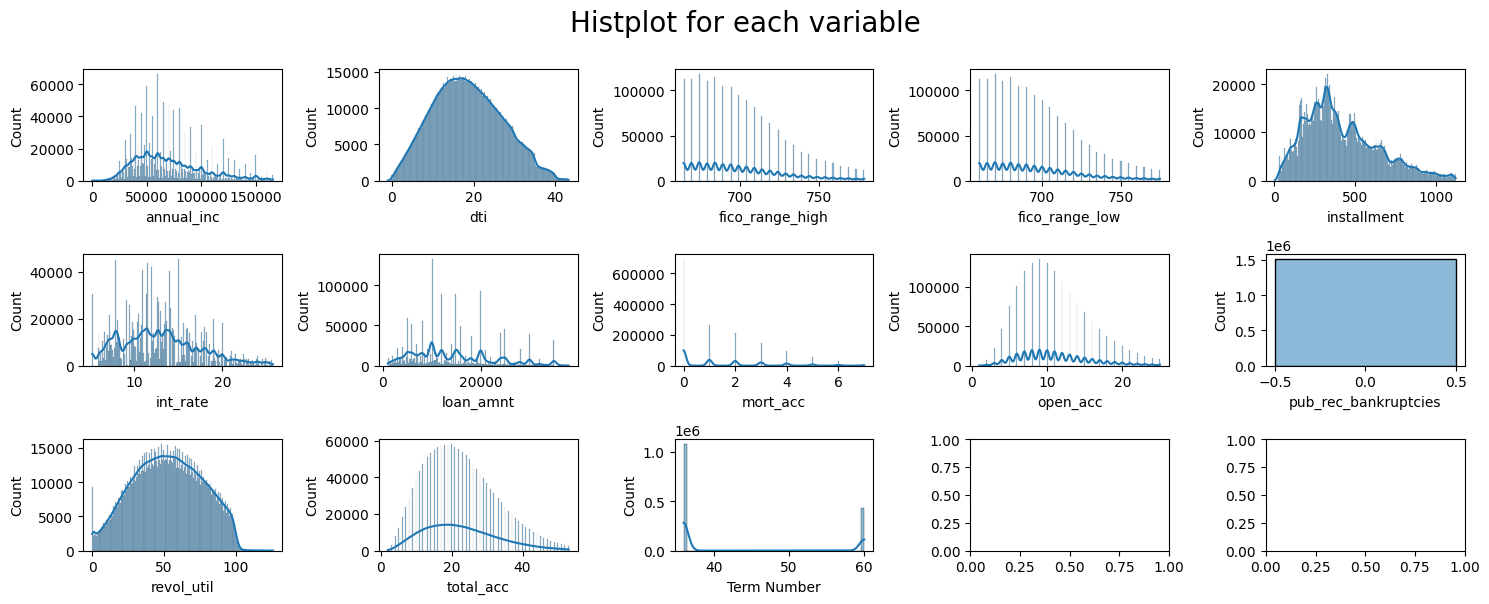

In [ ]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=accepted_trim,column=numerical)
plt.tight_layout()

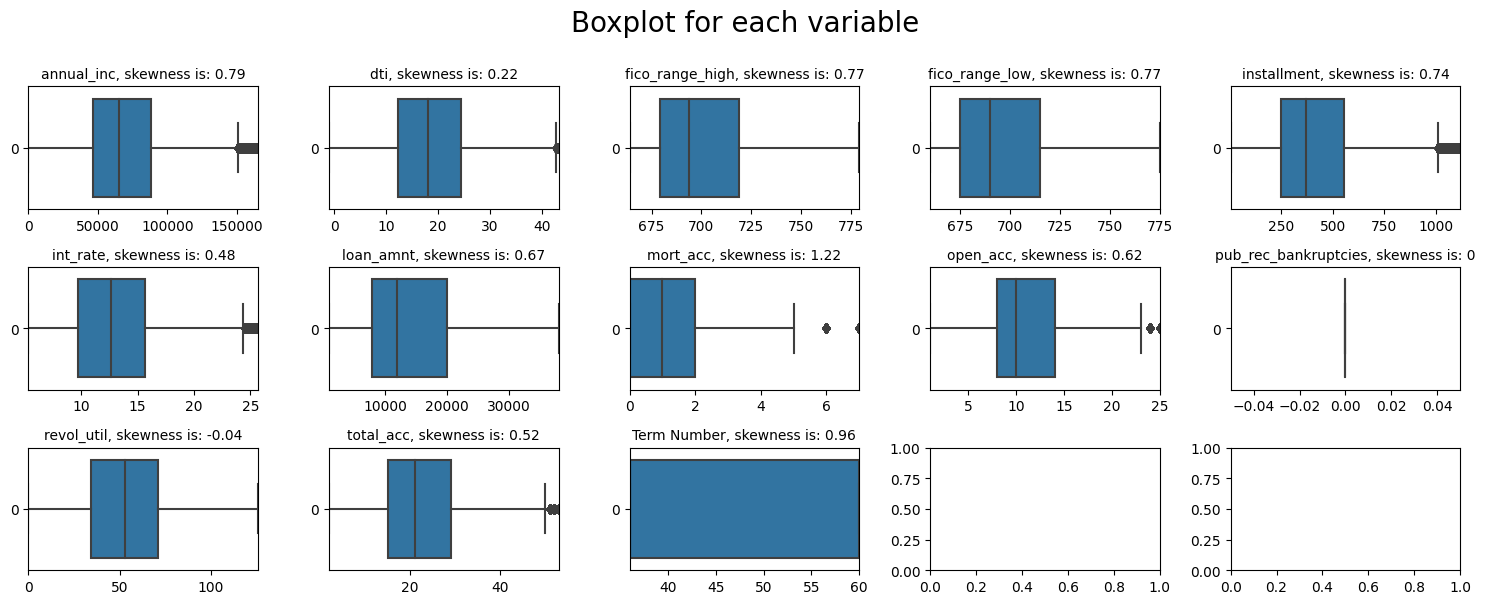

In [ ]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=accepted_trim,column=numerical)
plt.tight_layout()

# Feature Engineering

In [ ]:
accepted_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504896 entries, 0 to 2260698
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   addr_state            1504896 non-null  object 
 1   annual_inc            1504896 non-null  float64
 2   dti                   1504896 non-null  float64
 3   emp_length            1504896 non-null  object 
 4   fico_range_high       1504896 non-null  float64
 5   fico_range_low        1504896 non-null  float64
 6   grade                 1504896 non-null  object 
 7   home_ownership        1504896 non-null  object 
 8   installment           1504896 non-null  float64
 9   int_rate              1504896 non-null  float64
 10  loan_amnt             1504896 non-null  float64
 11  loan_status           1504896 non-null  object 
 12  mort_acc              1504896 non-null  float64
 13  open_acc              1504896 non-null  float64
 14  pub_rec_bankruptcies  1504896 non-

In [ ]:
accepted_trim['loan_status'].value_counts(dropna=False)

Fully Paid            729131
Current               578561
Charged Off           175967
Late (31-120 days)     13270
In Grace Period         5316
Late (16-30 days)       2628
Default                   23
Name: loan_status, dtype: int64

In [ ]:
accepted_trim['loan_status'].value_counts(normalize=True)

Fully Paid            0.484506
Current               0.384452
Charged Off           0.116930
Late (31-120 days)    0.008818
In Grace Period       0.003532
Late (16-30 days)     0.001746
Default               0.000015
Name: loan_status, dtype: float64

Setting up the target variable. We create a Loan Status Variable 'Current or Good', vs 'Default or Bad' based on values provided in the loan_status column.

In [ ]:
#Setting up the target variable 'loan_status_log'

def loans_classification(string):
    if "Current" in string:
        return 1
    elif "Fully Paid" in string:
        return 1
    elif "In Grace Period" in string:
        return 1
    elif "Late" in string:
        return 0
    elif "Charged Off" in string:
        return 0

accepted_trim['loan_status_log'] = accepted_trim['loan_status'].map(loans_classification)
accepted_trim.head()

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,...,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc,Term Number,Term Unit,loan_status_log
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,...,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0,36,months,1.0
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,...,22.0,0.0,small_business,19.2,C1,36 months,38.0,36,months,1.0
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,...,6.0,0.0,home_improvement,56.2,B4,60 months,18.0,60,months,1.0
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,...,12.0,0.0,major_purchase,64.5,F1,60 months,35.0,60,months,1.0
5,GA,34000.0,10.20,4 years,694.0,690.0,C,RENT,405.18,13.44,...,5.0,0.0,debt_consolidation,68.4,C3,36 months,6.0,36,months,1.0


In [ ]:
accepted_trim['loan_status_log'].value_counts()

1.0    1313008
0.0     191865
Name: loan_status_log, dtype: int64

In [ ]:
accepted_trim['loan_status_log'].value_counts(normalize=True)

1.0    0.872504
0.0    0.127496
Name: loan_status_log, dtype: float64

Transforming the 'emp_length' variable.

In [ ]:
accepted_trim['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '8 years',
       '5 years', '2 years', '< 1 year', '9 years', '7 years'],
      dtype=object)

In [ ]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10}

In [ ]:
accepted_trim['emp_length'] = accepted_trim['emp_length'].apply(lambda x: emp_length_map[x])

In [ ]:
accepted_trim['emp_length'].unique()

array([10,  3,  4,  6,  1,  8,  5,  2,  0,  9,  7])

In [ ]:
accepted_trim.columns

Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'open_acc',
       'pub_rec_bankruptcies', 'purpose', 'revol_util', 'sub_grade', 'term',
       'total_acc', 'Term Number', 'Term Unit', 'loan_status_log'],
      dtype='object')

Variable: Purpose

In [ ]:
accepted_trim['purpose'].value_counts()

debt_consolidation    858162
credit_card           361188
other                  90521
home_improvement       86231
major_purchase         31420
medical                17235
car                    15420
small_business         13735
moving                 10542
vacation               10461
house                   8011
wedding                 1079
renewable_energy         890
educational                1
Name: purpose, dtype: int64

In [ ]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    elif "major_purchase" in string:
        return 'major_purchase'
    else:
        return 'other'

accepted_trim['purpose'] = accepted_trim['purpose'].map(purpose_category)
accepted_trim['purpose'].value_counts()

debt_consolidation    858162
credit_card           361188
other                 167895
home_improvement       86231
major_purchase         31420
Name: purpose, dtype: int64

One Hot Encoding

In [ ]:
pd.get_dummies(accepted_trim[['home_ownership', 'purpose', 'grade','term']], drop_first=True).head()

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
5,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
#to dataframe
accepted_trim_dummies = pd.get_dummies(accepted_trim[['home_ownership', 'purpose', 'grade','term']], drop_first=True)

In [ ]:
accepted_trim_dummies.shape

(1504896, 16)

Defining X and y

In [ ]:
X = accepted_trim.drop(columns = ['addr_state', 'grade', 'loan_status', 'term', 'Term Unit', 'Term Number', 'loan_status_log', 'home_ownership', 'purpose', 'sub_grade'],axis=1)
y = accepted_trim[['loan_status_log']]

In [ ]:
X.shape

(1504896, 13)

In [ ]:
X.head()

,annual_inc,dti,emp_length,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,pub_rec_bankruptcies,revol_util,total_acc
0,55000.0,5.91,10,679.0,675.0,123.03,13.99,3600.0,1.0,7.0,0.0,29.7,13.0
1,65000.0,16.06,10,719.0,715.0,820.28,11.99,24700.0,4.0,22.0,0.0,19.2,38.0
2,63000.0,10.78,10,699.0,695.0,432.66,10.78,20000.0,5.0,6.0,0.0,56.2,18.0
4,104433.0,25.37,3,699.0,695.0,289.91,22.45,10400.0,6.0,12.0,0.0,64.5,35.0
5,34000.0,10.20,4,694.0,690.0,405.18,13.44,11950.0,0.0,5.0,0.0,68.4,6.0


In [ ]:
y.shape

(1504896, 1)

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.480316,-1.501973,1.112929,-0.771637,-0.771637,-1.294536,0.237892,-1.297045,-0.214379,-0.855725,0.0,-0.958037,-0.930553
1,-0.158436,-0.294776,1.112929,0.662469,0.662469,1.773460,-0.216813,1.293595,1.580590,2.314031,0.0,-1.396937,1.515623
2,-0.222812,-0.922756,1.112929,-0.054584,-0.054584,0.067879,-0.491909,0.716533,2.178912,-1.067042,0.0,0.149662,-0.441318
3,1.110835,0.812516,-0.769657,-0.054584,-0.054584,-0.560241,2.161292,-0.462147,2.777235,0.200861,0.0,0.496602,1.222081
4,-1.156265,-0.991739,-0.500717,-0.233847,-0.233847,-0.053037,0.112848,-0.271839,-0.812701,-1.278359,0.0,0.659621,-1.615482


In [ ]:
pd.DataFrame(X_scaled, columns=X.columns).head()

,annual_inc,dti,emp_length,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,pub_rec_bankruptcies,revol_util,total_acc
0,-0.480316,-1.501973,1.112929,-0.771637,-0.771637,-1.294536,0.237892,-1.297045,-0.214379,-0.855725,0.0,-0.958037,-0.930553
1,-0.158436,-0.294776,1.112929,0.662469,0.662469,1.773460,-0.216813,1.293595,1.580590,2.314031,0.0,-1.396937,1.515623
2,-0.222812,-0.922756,1.112929,-0.054584,-0.054584,0.067879,-0.491909,0.716533,2.178912,-1.067042,0.0,0.149662,-0.441318
3,1.110835,0.812516,-0.769657,-0.054584,-0.054584,-0.560241,2.161292,-0.462147,2.777235,0.200861,0.0,0.496602,1.222081
4,-1.156265,-0.991739,-0.500717,-0.233847,-0.233847,-0.053037,0.112848,-0.271839,-0.812701,-1.278359,0.0,0.659621,-1.615482


In [ ]:
accepted_trim_sc = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
accepted_trim_sc.shape

(1504896, 13)

In [ ]:
# accepted_trim_new = pd.concat([ accepted_trim_sc, accepted_trim_dummies,], axis=1, join='inner')
accepted_trim_new = pd.concat([accepted_trim_sc, accepted_trim_dummies.reindex(accepted_trim_sc.index)], axis=1)
accepted_trim_new.head()

,annual_inc,dti,emp_length,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,...,purpose_home_improvement,purpose_major_purchase,purpose_other,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months
0,-0.480316,-1.501973,1.112929,-0.771637,-0.771637,-1.294536,0.237892,-1.297045,-0.214379,-0.855725,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.158436,-0.294776,1.112929,0.662469,0.662469,1.773460,-0.216813,1.293595,1.580590,2.314031,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.222812,-0.922756,1.112929,-0.054584,-0.054584,0.067879,-0.491909,0.716533,2.178912,-1.067042,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.110835,0.812516,-0.769657,-0.054584,-0.054584,-0.560241,2.161292,-0.462147,2.777235,0.200861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.156265,-0.991739,-0.500717,-0.233847,-0.233847,-0.053037,0.112848,-0.271839,-0.812701,-1.278359,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
accepted_trim_new.shape

(1504896, 29)

In [ ]:
# accepted_trim_new = pd.merge(accepted_trim_dummies, accepted_trim_sc,  left_index=True, right_index=True)
# accepted_trim_new.head()

In [ ]:
accepted_trim_new.shape

(1504896, 29)

In [ ]:
y.shape

(1504896, 1)

In [ ]:
# Drop null values from y
y.dropna(inplace=True)

# Keep only the rows in accepted_trim_new whose index is present in y
accepted_trim_new = accepted_trim_new[accepted_trim_new.index.isin(y.index)]

# Keep only the rows in y whose index is present in accepted_trim_new
y = y[y.index.isin(accepted_trim_new.index)]

print(f"Shape of y: {y.shape}")
print(f"Shape of accepted_trim_new: {accepted_trim_new.shape}")

Shape of y: (1022327, 1)
Shape of accepted_trim_new: (1022327, 29)


# Machine Learning Models

The Machine Learning Models detailed herein are:
1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Classifier
4. K Nearest Neighbours


These models leverage advanced algorithms to assess and predict creditworthiness.

The Evaluation Metrics considered for testing out the accuracy of the Machine learning models were Precision, Recall and F1 Scores.

Precision gives the proportion of positive identifications that were indeed correct, reflecting the model's ability to accurately pinpoint actual risky loans. It can be defined as:
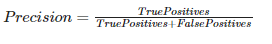


Recall (Sensitivity) determines the proportion of real positives that were correctly identified therefore implying, a highly sensitive test accurately detects credit that carries risk. It can be defined as:

 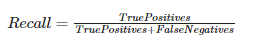


The F1 Score proves valuable in situations where a trade-off between precision and recall is necessary. It is calculated using the following formula:

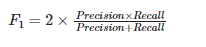

Accuracy refers to the number of correctly predicted risks out of all the data points, providing an overall measure of the model's correctness.

Since our objective is to minimize the Lending Club loss while predicting the risk of loanee default,

A good Recall Rate is desirable since it seeks to identify the maximum amount of loanees that are prone to stop paying their debts, thus a small number of False Negatives is sought.

A good Precision rate is useful in seeking to minimize the number of false positives, avoiding a scenario where loanees are mistakenly classified as defaulters.

The Confusion Matrix comes in handy to check and visualize how the models perform on the test set and the accuracy score tests how well the models predict the loan status of the loanees.

In [ ]:
# # drop rows with null values in accepted_trim and rejected_df
# accepted_trim.dropna(inplace=True)


In [ ]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.3, random_state=42)

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# Initializing the models
lr = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
ln = LinearRegression()

### Logistic Regression

In [ ]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.3, random_state=42)

# Initializing the model
lr = LogisticRegression()

# Logistic Regression Model
model1 = [lr]

# Function to train and evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model in models:
        # Training the model
        model.fit(X_train, y_train.values.ravel())  # y_train.values.ravel() to avoid warnings
        # Making predictions
        y_pred = model.predict(X_test)
        # Evaluating the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
        # Evaluate model precision
        precision = precision_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Precision: {precision}")

        # Evaluate model recall
        recall = recall_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, Recall: {recall}")

        # Evaluate model F1 score
        f1 = f1_score(y_test, y_pred)
        print(f"Model: {model.__class__.__name__}, F1 Score: {f1}")

        # Print confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix: \n{conf_matrix}")

# Running the function
train_and_evaluate(model1, X_train, X_test, y_train, y_test)

Model: LogisticRegression, Accuracy: 0.8700941313796263
Model: LogisticRegression, Precision: 0.8700941313796263
Model: LogisticRegression, Recall: 1.0
Model: LogisticRegression, F1 Score: 0.9305351177565923
Confusion Matrix: 
[[     0  39842]
 [     0 266857]]


Accuracy: The accuracy of the model is 0.87, which means that it correctly predicts the outcome (credit risk or no credit risk) for approximately 87% of the data points.

Precision: The precision of the model is also 0.87, indicating that when it predicts a loan to have credit risk, it is correct approximately 87% of the time.

Recall: The recall of the model is 1.0, which means that it correctly identifies all the loans with credit risk. In other words, it does not miss any loans that actually carry risk.

F1 Score: The F1 score is 0.93, which is a harmonic mean of precision and recall. It provides an overall measure of the model's performance, combining its ability to identify risky loans and the accuracy of those identifications.

Confusion Matrix: The confusion matrix shows the model's predictions against the actual values. In this case, the model predicts no loans with credit risk (0) for the entire dataset, while the actual data contains 39,842 loans with credit risk and 266,857 loans without credit risk.

Based on these results, the model seems to be highly accurate and precise in identifying loans without credit risk. However, it fails to identify any loans with credit risk (possibly due to an imbalance in the dataset). Further investigation and analysis are required to determine the reasons behind this and to evaluate the model's overall performance.

###Random Forest Classifier

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint

# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Train the model
random_search.fit(X_train, y_train.values.ravel())

# Print the best parameters found by RandomizedSearchCV
print(random_search.best_params_)

# Predict the test set results using the best model
y_pred = random_search.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# Evaluate model precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# Evaluate model recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# Evaluate model F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

{'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 163}
Model: RandomForestClassifier, Accuracy: 0.8703549734430174
Model: RandomForestClassifier, Precision: 0.7575177797969955
Model: RandomForestClassifier, Recall: 0.8703549734430174
Model: RandomForestClassifier, F1 Score: 0.8100256802082112
Confusion Matrix: 
[[     0  26508]
 [     0 177958]]


Accuracy: The accuracy of the model is 0.87, indicating that it correctly predicts the outcome (credit risk or no credit risk) for approximately 87% of the data points.

Precision: The precision of the model is 0.76, meaning that when it predicts a loan to have credit risk, it is correct approximately 76% of the time.

Recall: The recall of the model is also 0.87, suggesting that it identifies approximately 87% of the actual loans with credit risk.

F1 Score: The F1 score is 0.81, which combines the precision and recall into a single metric. It provides an overall measure of the model's performance, balancing both the accuracy of predictions and the model's ability to identify true credit risk.

Confusion Matrix: The confusion matrix displays the model's predictions against the actual values. In this case, the model predicts no loans with credit risk (0) for the entire dataset, while the actual data contains 26,508 loans with credit risk and 177,958 loans without credit risk.

Based on these results, the model demonstrates a high accuracy rate, but its precision is relatively low, indicating a significant number of false positive predictions (predicting credit risk when there is none). This suggests that the model may be prone to overestimating the presence of credit risk. Further evaluation and refinement may be required to improve the precision and overall performance of the model in credit assessment tasks.

###Support Vector Classifier

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# # Split the dataset into train and test data
# X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# # Define parameter distribution
# param_dist = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# # Initialize the SVC model
# svc = SVC()

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# # Train the model
# random_search.fit(X_train, y_train.values.ravel())

# # Print the best parameters found by RandomizedSearchCV
# print(random_search.best_params_)

# # Predict the test set results using the best model
# y_pred = random_search.predict(X_test)

# # Evaluate model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# # Evaluate model precision
# precision = precision_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# # Evaluate model recall
# recall = recall_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# # Evaluate model F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# # Print confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{conf_matrix}")


 We first define a dictionary param_dist specifying multiple potential values for the C, gamma, and kernel parameters of SVC. Then, we initialize the SVC model and create a RandomizedSearchCV object. We provide the SVC model, the parameter distribution, specify the number of parameter settings that are sampled (n_iter), the number of folds in cross-validation (cv), and use all available CPU cores for computation (n_jobs=-1).

The RandomizedSearchCV object is then fit to the training data, and we print the best parameters found. Finally, we make predictions on the test set using the best model found by RandomizedSearchCV and calculate the model accuracy.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter, which is more computationally efficient than trying every single combination, especially when the number of parameters and their potential values are quite large.

### K Nearest Neighbors

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from scipy.stats import randint
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# # Split the dataset into train and test data
# X_train, X_test, y_train, y_test = train_test_split(accepted_trim_new, y, test_size=0.2, random_state=42)

# # Define parameter distribution
# param_dist = {
#     'n_neighbors': randint(1, 50),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

# # Initialize the KNN Classifier
# knn = KNeighborsClassifier()

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# # Train the model
# random_search.fit(X_train, y_train.values.ravel())

# # Print the best parameters found by RandomizedSearchCV
# print(random_search.best_params_)

# # Predict the test set results using the best model
# y_pred = random_search.predict(X_test)

# # Evaluate model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Accuracy: {accuracy}")

# # Evaluate model precision
# precision = precision_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Precision: {precision}")

# # Evaluate model recall
# recall = recall_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, Recall: {recall}")

# # Evaluate model F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"Model: {random_search.best_estimator_.__class__.__name__}, F1 Score: {f1}")

# # Print confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{conf_matrix}")

